In [12]:
pl.style.use('/Users/pedro/Dropbox/DES/des.mplstyle')

In [1]:
sys.path.append('../des/')
sys.path.append('../tno/')

Let's get an example script showing how to transform the Minor Planet Center TNO population to DES observations. The elements are from the MPC `distant_extended.json` file and transformed to 2016 elements by `HelioToBary`. One detail: the standard `$ORBITPP` `y4a1.exposure.positions.fits` doesn't really work, so change that to `alldes.exposure.positions.fits`. 


First, create the population.

In [2]:
import population as pop
mpc_elements = tb.Table.read('mpc.fits')
eldic = {'a' : mpc_elements['a'], 'e' : mpc_elements['e'], 'i' : mpc_elements['i'], 'lan' : mpc_elements['Node'], 'aop' : mpc_elements['Peri'], 'top' : mpc_elements['Tp']}

mpc = pop.ElementPopulation(eldic, 16)

Then, create the survey

In [3]:
import des
y4 = des.DES('y4a1')

In [4]:
out = y4.createObservations(mpc, 'mpcobs.fits')

/Users/pedro/Documents/Software/orbitspp/bin/DESTracks -cornerFile=/Users/pedro/Documents/Software/orbitspp/data/y4a1.ccdcorners.fits -exposureFile=/Users/pedro/Documents/Software/orbitspp/data/y4a1.exposure.positions.fits -tdb0=16 -positionFile=mpcobs.fits -readState=F < elements.txt


In [5]:
out

CCDNUM,DEC,EXPNUM,ORBITID,RA,TDB
int32,float64,int32,int64,float64,float64
3,-3.827419624798269,229723,2,8.859255689357301,13.669675068100561
51,-3.892351564182717,231937,2,8.716937833783492,13.688470521924241
18,-3.8924602705713656,231945,2,8.716689746431454,13.688501695804934
6,-3.920607060818925,233128,2,8.652912068944445,13.696563346299198
53,-4.0715132960179705,238948,2,8.288814396451045,13.740231223658759
0,-4.116625168362312,240697,2,8.171900670290661,13.753863649064426
32,-4.116768567817977,240708,2,8.171517285835002,13.753907693665015
0,-4.202533199595512,243586,2,7.935956188538573,13.781583553651272
0,-4.202544156153999,243587,2,7.93592426547547,13.78158730384951


In [10]:
orb, c = np.unique(out['ORBITID'], return_counts=True)

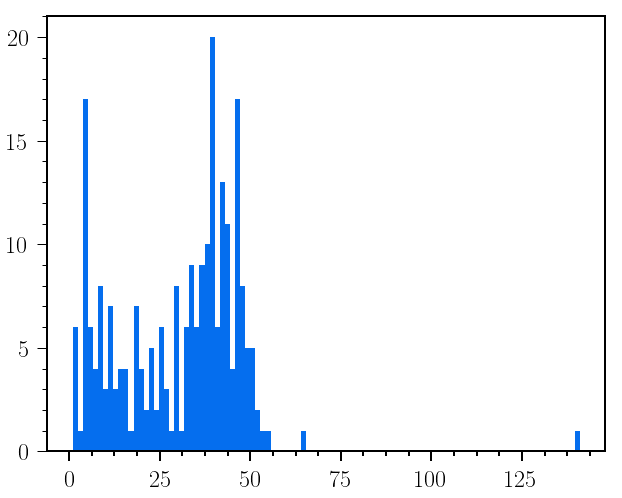

In [13]:
pl.hist(c, bins=100)
pl.show()

In [15]:
len(c[c < 6])

24

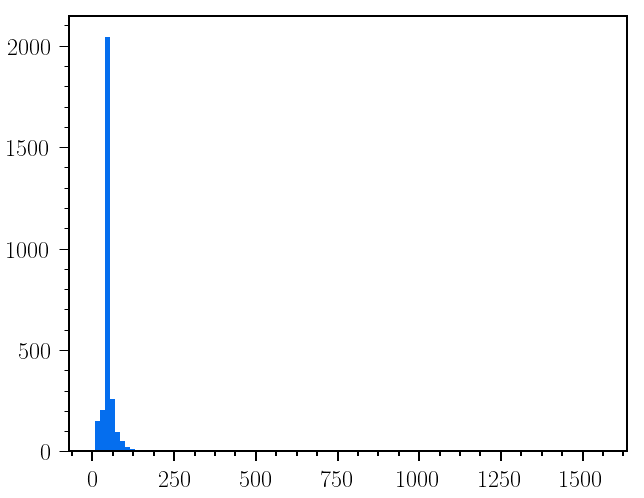

In [20]:
pl.hist(mpc.elements[:,0], bins=100)
pl.show()

In [22]:
mpc.elements[mpc.elements[:,0] > 1500][0]

array([1.55961292e+03, 9.76799973e-01, 2.06337442e+01, 3.36831766e+02,
       1.33949767e+02, 2.43901077e+06])

In [23]:
mpc_elements[mpc_elements['a'] > 1500]

a,e,Epoch,i,Name,Node,Number,Peri,Tp
float64,float64,float64,float64,str14,float64,str8,float64,float64
1559.612916461782,0.9767999734025082,2457388.999210834,20.633744218795613,N/A,336.8317661924023,N/A,133.94976668435518,2439010.7655420667
